# Assignment 1

## Importing and reviewing dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Titanic_Dataset.csv")

In [3]:
titanicData = data.copy()

In [4]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns "Age", "Cabin", and "Embarked" are not full.

## Plotting dataset

In [6]:
import matplotlib.pyplot as plt

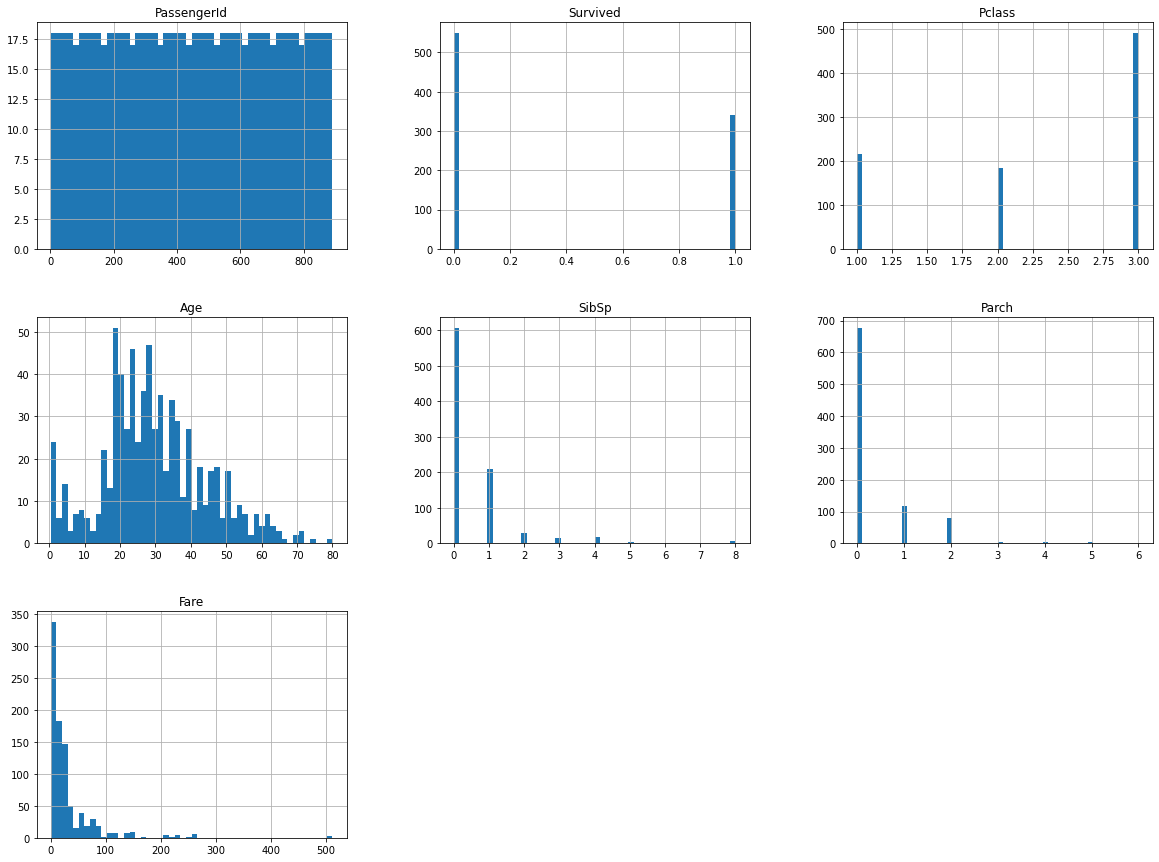

In [7]:
titanicData.hist(bins=50, figsize=(20,15)) #histogram
plt.show()

Age and Fare are good to look at in histogram form, and can be used to correlate to survival. We can ignore PassengerId completely.

<AxesSubplot:>

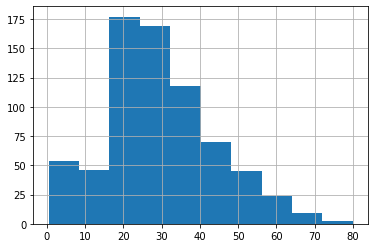

In [8]:
titanicData["Age"].hist()

## Correlation

In [9]:
corr_matrix = titanicData.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


## Impute Age, Embarked, Cabin

In [10]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')

<AxesSubplot:>

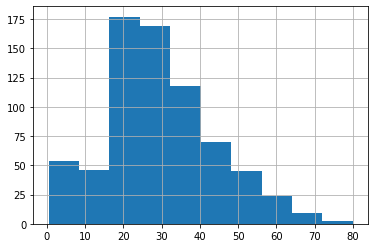

In [11]:
titanicData["Age"].hist()

<AxesSubplot:>

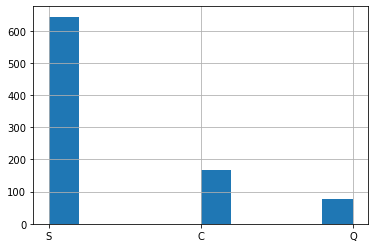

In [12]:
titanicData["Embarked"].hist()

<AxesSubplot:>

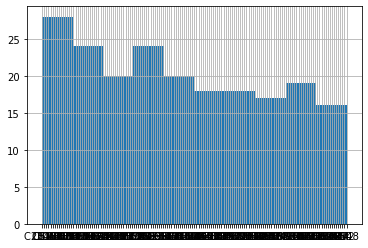

In [13]:
titanicData["Cabin"].hist()

In [14]:
titanicData["Age"]=imputer1.fit_transform(titanicData[["Age"]])

In [15]:
titanicData["Embarked"]=imputer2.fit_transform(titanicData[["Embarked"]])

In [16]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Age sub categorized

<AxesSubplot:>

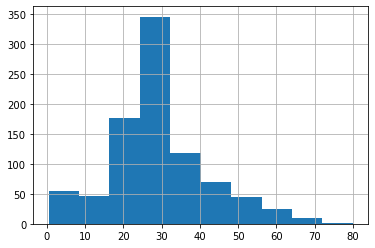

In [17]:
titanicData["Age"].hist()

In [18]:
titanicData["Age"] = pd.cut(titanicData["Age"], bins=[0,10,20,30,40,50,np.inf], labels=[1,2,3,4,5,6])

<AxesSubplot:>

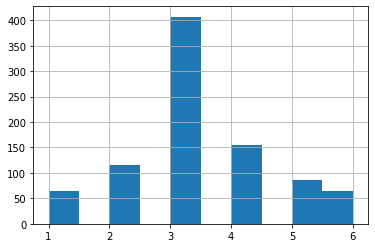

In [19]:
titanicData["Age"].hist()

In [20]:
from sklearn.model_selection import train_test_split
strat_training_set, strat_test_set = train_test_split(titanicData, test_size=0.8, 
                                                      stratify=titanicData['Age'], 
                                                      random_state =42)

In [21]:
strat_training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 554 to 534
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  178 non-null    int64   
 1   Survived     178 non-null    int64   
 2   Pclass       178 non-null    int64   
 3   Name         178 non-null    object  
 4   Sex          178 non-null    object  
 5   Age          178 non-null    category
 6   SibSp        178 non-null    int64   
 7   Parch        178 non-null    int64   
 8   Ticket       178 non-null    object  
 9   Fare         178 non-null    float64 
 10  Cabin        48 non-null     object  
 11  Embarked     178 non-null    object  
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 17.1+ KB


In [22]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [23]:
for cat in (strat_training_set, strat_test_set):
    cat.drop("Age", axis=1, inplace=True)

In [24]:
newData = strat_training_set.copy()

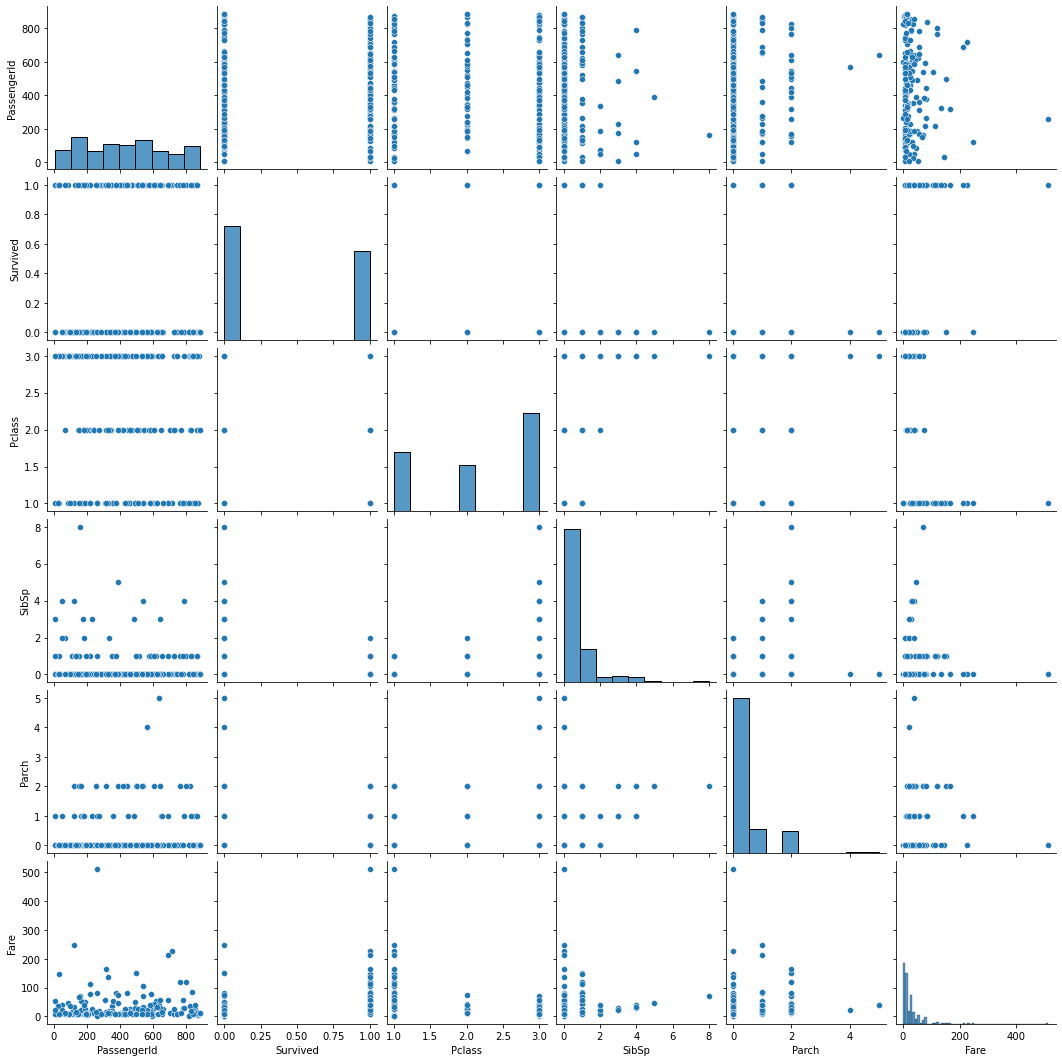

In [25]:
import seaborn as sns
sns.pairplot(data=newData)

In [26]:
newData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
newData=pd.get_dummies(newData[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']], drop_first=True)

In [28]:
newData.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,"Name_Alhomaki, Mr. Ilmari Rudolf","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine",...,Cabin_E36,Cabin_E38,Cabin_E49,Cabin_E58,Cabin_E67,Cabin_E77,Cabin_F33,Cabin_F4,Embarked_Q,Embarked_S
554,555,1,3,0,0,7.775,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
716,717,1,1,0,0,227.525,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,200,0,2,0,0,13.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
368,369,1,3,0,0,7.750,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,352,0,1,0,0,35.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
newData.to_csv('titanicUpdated.csv', index=False)